In [1]:
import pandas as pd
import io

In [3]:
!pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio
import sklearn
import scipy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# set up plotting defaults
%matplotlib inline
set_matplotlib_formats("svg")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (4, 3)
pio.templates.default = "simple_white"

# display options for numpy and pandas
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

In [6]:
df = pd.read_csv('StudentsPerformance.csv')

# EDA

## Question:
- Is there a correlation between lunch status and math scores?

- Do students with parents of higher level of education score higher?

- Does ethnicity influence scores?

- Do students earn higher score if they do test prep?

- Average score of student by parent education, lunch, gender, race, test prep.

- Which has the highest positive correlation to math scores?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Checking what data type the variables are
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
                                ...  
math score                      int64
reading score                   int64
writing score                   int64
Length: 8, dtype: object

In [9]:
#Exploring the statistics of math, reading and writing scores.
df.describe()

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
...,...,...,...
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [10]:
#Checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
                              ..
math score                     0
reading score                  0
writing score                  0
Length: 8, dtype: int64

In [11]:
df.value_counts()

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                                                                       ..
female  group D         associate's degree           standard      none                     76          74             73               1
                                                                                            77          77             73               1
male    group E         some high schoo

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
#Checking what data type math scores are.
df['math score'].dtype

dtype('int64')

# Exploring socio-economic status and math scores

In the united states a student qualifies for free and reduced lunch if they come from a house hold that falls below poverty line

## Question: Do students from lower socio-econimc status familes score lower on math assessments?

In [14]:
#Analyze just lunch and scores
lunch = df
lunch = lunch.drop(columns=['race/ethnicity','parental level of education', 'test preparation course','gender'])
#Here I drop 'race/ethnicity','parental level of education', 'test preparation course','gender' and focus just on math scores and lunch category (socio-economic status)

In [15]:
lunch['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

# Observation:
64.5% of students are on standard lunch and 35.5% are on free/reduced lunch. Since the data is unbalanced here I might have to use statistical methods to check if the difference in mean between both groups is due to random chance.

In [16]:
grouped_lunch = lunch.groupby('lunch')#I use this to group students by their lunch(socio-econimic) status.

In [17]:
grouped_lunch.head()

,lunch,math score,reading score,writing score
0,standard,72,72,74
1,standard,69,90,88
2,standard,90,95,93
...,...,...,...,...
8,free/reduced,64,64,67
9,free/reduced,38,60,50
17,free/reduced,18,32,28


In [35]:
#print(lunch['math score'].mean())
grouped_lunch = lunch.groupby('lunch')
mean_by_lunch = grouped_lunch['math score'].mean()
print(mean_by_lunch)#display mean score of both groups

px.box(lunch, x='math score',y='lunch', color='lunch')#Use boxplot to visualize IQR, Median, Outliers and Range.

lunch
free/reduced    58.92
standard        70.03
Name: math score, dtype: float64


# Observation:
Students in standard category have a medain math score of 69 while students in free/reduced category have a median score of 69. This is a 9 point difference. Additionally 50% of students on standard lunch scored between a 61 and 80 while 50% of students on a standard lunch scored between 49 and 69. It is clear that students on free/reduced lunch are scoring significantly lower than those classified as standard but is this due to random chance?

Next I will check to see if there is a difference in mean scores in math between these two categories.

In [19]:
mean_by_lunch = grouped_lunch['math score'].mean()
mean_by_lunch

lunch
free/reduced    58.92
standard        70.03
Name: math score, dtype: float64

# Obervation:
There is an 11.11 point difference between average math scores of students on standard lunch and free/reduced lunch.

Is this difference statistically significant or due to random chance?

I will have to do statistical analysis to find if the difference is statistically significant.

# Hypothesis testing:

Null Hypothesis: The observed difference in math scores between standard and free/reduced lunch is due to chance.



Alternative Hypothesis: the observed difference in math scores between standard and free/reduced lunch is not due to chance.

In [20]:
lunch.head()

,lunch,math score,reading score,writing score
0,standard,72,72,74
1,standard,69,90,88
2,standard,90,95,93
3,free/reduced,47,57,44
4,standard,76,78,75


In [21]:
#Dropping reading and writing scores so I can just focus on math scores.
lunch.drop(columns=['reading score','writing score'],inplace=True)

In [22]:
lunch.set_index('lunch') #Here I set the index to lunch.

,math score
lunch,
standard,72
standard,69
standard,90
...,...
free/reduced,59
standard,68
free/reduced,77


In [23]:
lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lunch       1000 non-null   object
 1   math score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Note:
Now I have to split these into two seperate sets

In [36]:
# Filtering the DataFrame based on 'lunch' values: standard and free/reduced
standard_scores = lunch[lunch['lunch'] == 'standard']['math score']
free_reduced_scores = lunch[lunch['lunch'] == 'free/reduced']['math score']

# Check if the data was filtered correctly
print("Standard Scores Sample:\n", standard_scores.head())
print("Free/Reduced Scores Sample:\n", free_reduced_scores.head())

Standard Scores Sample:
 0    72
1    69
2    90
4    76
5    71
Name: math score, dtype: int64
Free/Reduced Scores Sample:
 3     47
7     40
8     64
9     38
17    18
Name: math score, dtype: int64


In [37]:
standard_scores.head()

0    72
1    69
2    90
4    76
5    71
Name: math score, dtype: int64

In [38]:
fig = px.histogram(standard_scores, title='Standard Lunch Math Scores Distribution') #Checking distribution of standard math scores.
fig.show()

## Observation:
Standard scores are normally distributed. There are a few outlier scores. One student scored between 15-19 points and a second student scored 25-29 points. Additionally, there were six students who scored in the top percentile, achieving at least 100 on the test.

In [39]:
#Exploring free/reduced lunch scores
free_reduced_scores.head()

3     47
7     40
8     64
9     38
17    18
Name: math score, dtype: int64

In [40]:
fig2 = px.histogram(free_reduced_scores, title='Free/Reduced Lunch Math Scores Distribution')
fig2.show()

## Observation:
Free/reduced math scores are normally distributed. In this group, only one student achieved in the top percentile and earned a 100. There is a noticeable difference here, as more students in this group scored below 40 compared to standard lunch students.

# Using t-test:
I am using a t-test to compare the means of standard and free/reduced lunch to see if there is a statistically significant difference between the two.

In [41]:
from scipy.stats import ttest_ind

# Independent t-test
t_stat, p_value = ttest_ind(standard_scores, free_reduced_scores, equal_var=False)

# Results are printed
print(f"T-statistic: {t_stat:.9f}")
print(f"P-value: {p_value:.30f}")#used .30f to see the p-value to the 30th decimal place.

# Helps with Interpretation
if p_value < 0.05:
    print("Statistically significant difference!")
else:
    print("No significant difference between groups.")

T-statistic: 11.484100293
P-value: 0.000000000000000000000000000554
Statistically significant difference!


## Conclusion on EDA for socio-economic status and math scores:
A t-statistic score of +/- 2 signifies that there is not significant difference between the means of both groups. The t-statistic of our groups is +11. This signifies that there is a very large difference between the math scores of standard and free/reduced lunch.

The p-value is far below 5% and is 00000000000000000000000000554% which is very close to zero.

The p-value tells us that there is an extremely small probability that this observed difference happened by random chance.

I must reject the null hypothesis: The difference in math scores between standard and free/reduced is due to chance.


## Possible Confounding Variables:

The difference may not be due just to socio-economic status but other confounding factors such as (race/ethnicity, gender, parental level of education	lunch	test preparation course)

I must explore these variables further to gain deeper understanding of factors that contribute to math scores.

# EDA continued: Exploring Gender and Math Scores:

Question:

- Is there a noticeable difference in math scores between genders in this data set?

In [42]:
#Making a copy of df to just focus on gender
Gender = df.copy()
Gender.drop(columns=['parental level of education', 'lunch','test preparation course','race/ethnicity','reading score','writing score'],inplace=True)

In [43]:
Gender.head()

,gender,math score
0,female,72
1,female,69
2,female,90
3,male,47
4,male,76


In [48]:
#print(lunch['math score'].mean())
grouped_gender = Gender.groupby('gender')
mean_by_gender = grouped_gender['math score'].mean()
print(mean_by_gender)#display mean score of both groups

px.box(Gender, x='math score',y='gender', color='gender')#Use boxplot to visualize IQR, Median, Outliers and Range.

gender
female    63.63
male      68.73
Name: math score, dtype: float64


# Observation:
Students in female category have a medain math score of 65 while students in male category have a median score of 69. This is a 4 point difference. Additionally 50% of female students scored between a 54-74 while 50% of male students scored between 59-79. It seems that males are slightly outperfroming females in math scores but is this due to random chance?

Next I will check to see if there is a difference in mean scores in math between these two categories.

In [44]:
# Filtering the DataFrame based on 'Gender' values
female_scores = Gender[Gender['gender'] == 'female']['math score']
male_scores = Gender[Gender['gender'] == 'male']['math score']

# Check if the data was filtered correctly
print("female_scores Sample:\n", female_scores.head())
print("male_scores Scores Sample:\n", male_scores.head())

female_scores Sample:
 0    72
1    69
2    90
5    71
6    88
Name: math score, dtype: int64
male_scores Scores Sample:
 3     47
4     76
7     40
8     64
10    58
Name: math score, dtype: int64


In [45]:
# Exploring female scores
female_scores.describe()

count    518.00
mean      63.63
std       15.49
          ...  
50%       65.00
75%       74.00
max      100.00
Name: math score, Length: 8, dtype: float64

In [46]:
#Exploring male math scores
male_scores.describe()

count    482.00
mean      68.73
std       14.36
          ...  
50%       69.00
75%       79.00
max      100.00
Name: math score, Length: 8, dtype: float64

In [47]:
Gender_math = Gender.groupby(['gender', 'math score']).size()

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
Gender_math = Gender_math.reset_index()
# Create subplots (2 rows, 3 columns)
fig = make_subplots(rows=2, cols=1, subplot_titles=["female", "male"])

# Define groups
groups = ["female", "male"]
row_col = [(1, 1), (2, 1)]

# Loop through groups to create and add histograms to subplots
for i, group in enumerate(groups):
    group_data = Gender_math[Gender_math["gender"] == group]

    # Create histogram trace
    trace = go.Histogram(x=group_data["math score"], name=group)

    # Add trace to the subplot using row_col coordinates
    row, col = row_col[i]
    fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(title_text="Math Score Distributions by Gender", showlegend=False)
fig.show()

In [50]:
#mean of female scores
print(f'Female average math scores {np.mean(female_scores)}')

Female average math scores 63.633204633204635


In [51]:
#Standard deviarion of female math scores
print(f'Standard deviation in Female math scores {np.std(female_scores)}')

Standard deviation in Female math scores 15.4764928784033


In [52]:
print(f'Male average math scores {np.mean(male_scores)}')

Male average math scores 68.72821576763485


In [53]:
print(f'Standard deviation in male math scores {np.std(male_scores)}')

Standard deviation in male math scores 14.341377060332784


In [54]:
#Average math scores for both genders.
np.mean(Gender['math score'])

66.089

In [55]:
#Standard deviation for both genders
np.std(Gender['math score'])

15.155496659628149

## Visualizing all female, male and both gender distribution of data.

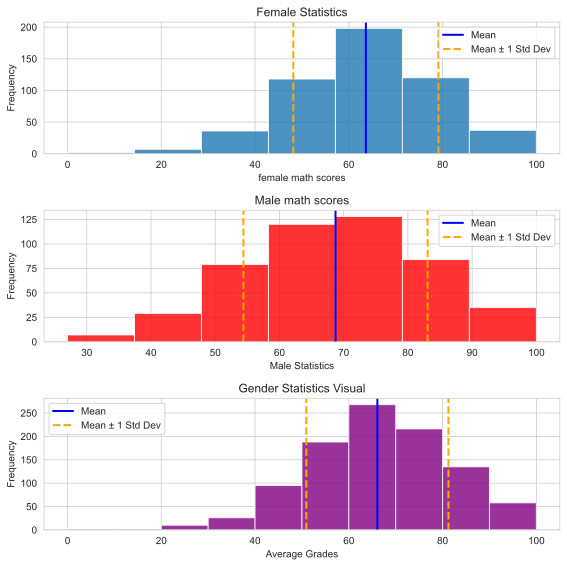

In [56]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Mean and standard deviation calculations
mean_female = np.mean(female_scores)
std_female = np.std(female_scores)

mean_male = np.mean(male_scores)
std_male = np.std(male_scores)

mean_all = np.mean(Gender['math score'])
std_all = np.std(Gender['math score'])

# Female histo
axs[0].hist(female_scores, bins=7, alpha=0.8)
axs[0].set_xlabel('female math scores')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Female Statistics')

# Adding mean and standard deviation lines to Female histo
axs[0].axvline(mean_female, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[0].axvline(mean_female + std_female, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[0].axvline(mean_female - std_female, color='orange', linestyle='dashed', linewidth=2)

# Male histo
axs[1].hist(male_scores, bins=7, alpha=0.8, color='red')
axs[1].set_xlabel('Male Statistics')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Male math scores')

# Adding mean and standard deviation lines to Male
axs[1].axvline(mean_male, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[1].axvline(mean_male + std_male, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[1].axvline(mean_male - std_male, color='orange', linestyle='dashed', linewidth=2)


# avaerage grade histo
axs[2].hist(Gender['math score'], bins=10, alpha=.8, color='purple')

axs[2].set_xlabel('Average Grades')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Gender Statistics Visual')

axs[2].axvline(mean_all, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[2].axvline(mean_all + std_all, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[2].axvline(mean_all - std_all, color='orange', linestyle='dashed', linewidth=2)

# legend for each subplot
for ax in axs:
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Observations: There is clearly a differnece in average scores between female and male students. However is this difference statistically significant or due to chance?

# Hypothesis Testing: Gender

Null Hypothesis: The observed difference in math scores between males and females is due to chance.



Alternative Hypothesis: The observed difference in math scores between males and females is not due to chance.

In [57]:
# Independent t-test
t_stat, p_value = ttest_ind(female_scores, male_scores, equal_var=False)

# Results are printed
print(f"T-statistic: {t_stat:.9f}")
print(f"P-value: {p_value:.9f}")#used .30f to see the p-value to the 30th decimal place.

# Helps with Interpretation
if p_value < 0.05:
    print("Statistically significant difference!")
else:
    print("No significant difference between groups.")

T-statistic: -5.398000564
P-value: 0.000000084
Statistically significant difference!


## Conclusion on Gender:
A t-statistic score of +/- 2 signifies that there is not significant difference between the means of both groups. The t-statistic of our groups is -5.3. This signifies that there is a difference between the math scores of males and females in this dataset.

The p-value is far below 5% and is 0.000000084% which is very close to zero.

The p-value tells us that there is an extremely small probability that this difference happened by random chance.

I must reject the null hypothesis: The difference in math scores between males and females is due to chance.


## Possible Confounding Variables:

As addressed earlier the difference may not be due just to gender but other confounding factors such as (socio-economic status, race/ethnicity, parental level of education, test preparation course)

I must explore these variables further to gain deeper understanding of factors that contribute to math scores.

# EDA continued: Race/Ethnicity

### Race/Ethnicity
Is there a correlation between race/ethnicity and scores in math?

In [58]:
#Analyze just lunch and scores
race = df.copy()
race.drop(columns=['parental level of education', 'test preparation course','gender','reading score','writing score'],inplace=True)
race['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [59]:
#Analyzing the value counts of race/ethnicity
race['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [60]:
race.head()

,race/ethnicity,lunch,math score
0,group B,standard,72
1,group C,standard,69
2,group B,standard,90
3,group A,free/reduced,47
4,group C,standard,76


## Exploring Race/Ethinicty and Lunch(socio-economic) status

In [61]:
#Race/ethnicity and lunch status
race_lunch = race.groupby(['race/ethnicity', 'lunch']).size()

In [62]:
print(race_lunch['group A'])

lunch
free/reduced    36
standard        53
dtype: int64


In [86]:
np.std(race_lunch['group A'])

8.5

In [63]:
count_A = (36 + 53)

### 29% of students in group A are on free/reduced lunch

In [64]:
race_lunch['group B']

lunch
free/reduced     69
standard        121
dtype: int64

In [85]:
np.std(race_lunch['group B'])

26.0

In [65]:
count_B = (69+121)

### 36% of students in group B are on free/reduced lunch.

In [66]:
race_lunch['group C']

lunch
free/reduced    114
standard        205
dtype: int64

In [84]:
np.std(race_lunch['group C'])

45.5

In [67]:
count_C = (114+205)

### 35% of students in group C are on free/reudced lunch

In [68]:
race_lunch['group D']

lunch
free/reduced     95
standard        167
dtype: int64

In [83]:
np.std(race_lunch['group D'])

36.0

In [69]:
count_D = (95+167)

### 36% of students in group D are on free and reduced lunch.

In [70]:
race_lunch['group E']

lunch
free/reduced    41
standard        99
dtype: int64

In [82]:
np.std(race_lunch['group E'])

29.0

In [71]:
count_E = (41+99)

### 29% of students in group E are on free and reduced lunch.

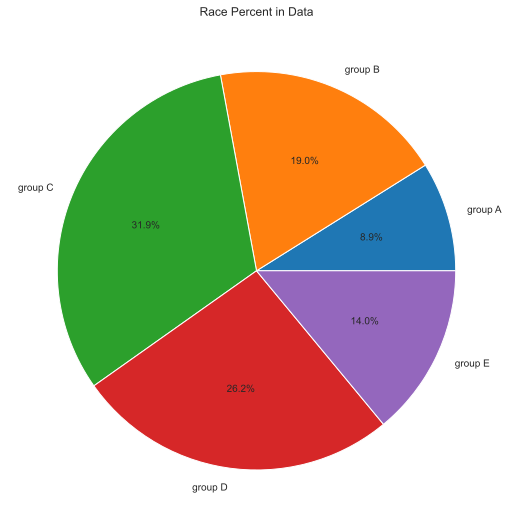

In [72]:
plt.figure(figsize=(9,9))
labels = ['group A','group B', 'group C', 'group D', 'group E']
sizes = [count_A ,count_B ,count_C,count_D, count_E]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Race Percent in Data')
plt.show()

## Observations:
The distribution of race is imbalanced. The race groups B, C, and D are the majority class while groups A and E are the minority class.

Group A only accounts for 8.9% of the data set while group C accounts for 31.9%. This is important as these score might not be a true reflection of the impact that race has on

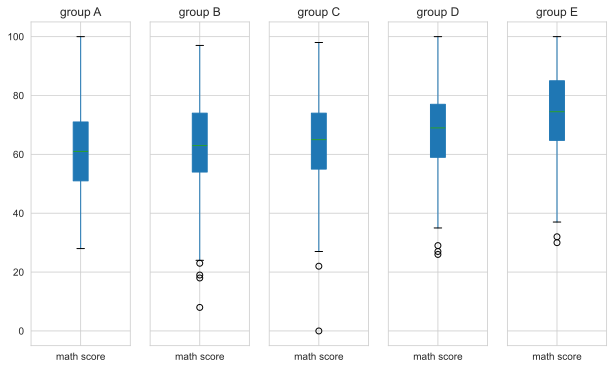

In [73]:
#Grouping race/ethnicity
race_grouped = race.groupby('race/ethnicity')
boxplot = race_grouped.boxplot(column='math score', layout=(1, len(race_grouped)), figsize=(10,6), patch_artist=True)

### Using plotly to make my box and whiskers plot interactive.

I am creating the same plot as the one above but using plotly instead.

In [ ]:
# Race and Math scores
px.box(
    race.reset_index(),  # Reset the index to make columns accessible
    x="math score",       # Use 'race/ethnicity' for x-axis
    y="race/ethnicity",          # Use 'math score' for y-axis
    title="Race/Ethincity and Math Scores",
    color='race/ethnicity'
).update_traces(boxmean=True)

## Observations from interactive plotly box plots:

Group E and D have the highest average scores at 73 for group E and 67 for group E.

Group A has the lowest average score at 61 and group B has an average score of 63.

In [75]:
#Average Scores in math, reading and writing by race/ethnicity
race_grouped['math score'].mean()

race/ethnicity
group A    61.63
group B    63.45
group C    64.46
group D    67.36
group E    73.82
Name: math score, dtype: float64

In [76]:
race_math = race.groupby(['race/ethnicity', 'math score']).size()
race_math['group A']

math score
28     1
34     1
37     1
      ..
92     1
97     1
100    1
Length: 47, dtype: int64

## Using visulization to make sure all Race/Ethincity groups have a normal distribution.

In [77]:
# Race and Math scores
# Filter data for group A
group_a_data = race_math.reset_index()  # Reset index to access columns
group_a_data = group_a_data[
    group_a_data["race/ethnicity"] == "group A"
]  # Filter for group A

# Create histogram for group A's math scores
fig = px.histogram(
    group_a_data,
    x="math score",  # Use 'math score' for x-axis (histogram bins)
    title="Math Score Distribution for Group A",
)

fig.show()

In [78]:
# Filter data for group A
group_a_data = race_math.reset_index()  # Reset index to access columns
group_a_data = group_a_data[
    group_a_data["race/ethnicity"] == "group B"
]  # Filter for group A

# Create histogram for group A's math scores
fig = px.histogram(
    group_a_data,
    x="math score",  # Use 'math score' for x-axis (histogram bins)
    title="Math Score Distribution for Group B",
)

fig.show()

In [79]:
# Filter data for group C
group_a_data = race_math.reset_index()  # Reset index to access columns
group_a_data = group_a_data[
    group_a_data["race/ethnicity"] == "group C"
]  # Filter for group C

# Create histogram for group C's math scores
fig = px.histogram(
    group_a_data,
    x="math score",  # Use 'math score' for x-axis (histogram bins)
    title="Math Score Distribution for Group C",
)

fig.show()

In [80]:
# Filter data for group A
group_a_data = race_math.reset_index()  # Reset index to access columns
group_a_data = group_a_data[
    group_a_data["race/ethnicity"] == "group D"
]  # Filter for group D

# Create histogram for group D's math scores
fig = px.histogram(
    group_a_data,
    x="math score",  # Use 'math score' for x-axis (histogram bins)
    title="Math Score Distribution for Group D",
)

fig.show()

In [81]:
# Filter data for group E
group_a_data = race_math.reset_index()  # Reset index to access columns
group_a_data = group_a_data[
    group_a_data["race/ethnicity"] == "group E"
]  # Filter for group E

# Create histogram for group E's math scores
fig = px.histogram(
    group_a_data,
    x="math score",  # Use 'math score' for x-axis (histogram bins)
    title="Math Score Distribution for Group E",
)

fig.show()

# Observations: Race/Ethnicity does seem to be a factor in determining math scores. Performing a One-way ANOVA( Analysis of Variance) is a great way of determining this. 

In [ ]:
from scipy.stats import levene


stat, p_value = levene((race_lunch['group A']), (race_lunch['group B']), (race_lunch['group C']),(race_lunch['group C']))

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value > alpha:
    print("The variances are homogeneous (p > 0.05)")
else:
    print("The variances are not homogeneous (p ≤ 0.05)")

Levene's test statistic: inf
p-value: 0.0
The variances are not homogeneous (p ≤ 0.05)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:3345: RuntimeWarning:

divide by zero encountered in scalar divide



### Note: Can't use ANOVA since the variances are not homogeneous. 

In [88]:
import scipy.stats as stats

# Assuming you have your data in separate arrays by group
f_stat, p_value = stats.f_oneway((race_lunch['group A']), (race_lunch['group B']), (race_lunch['group C']),(race_lunch['group C']))
print(f"Welch's ANOVA: F-statistic = {f_stat}, p-value = {p_value}")

Welch's ANOVA: F-statistic = 2.544668882638711, p-value = 0.19433122565799513


## Conclusiong based on Welch's ANOVA: After performing a Welch's ANOVA test I must conclude that there is not sufficient evidence to determine that the differences observed in math score are due to race/ethnicity. The p-value was.19 which is greater than the standard of .05.

# EDA continued: Parent level of education and math scores

In [89]:
#Analyze just parental level of education and scores
parents = df.copy()
parents.drop(columns=['race/ethnicity', 'test preparation course','gender','reading score','writing score'],inplace=True)

In [90]:
parents.value_counts()

parental level of education  lunch     math score
some college                 standard  69            11
associate's degree           standard  65             8
some college                 standard  63             7
                                                     ..
high school                  standard  48             1
                                       47             1
some high school             standard  97             1
Name: count, Length: 473, dtype: int64

In [91]:
parents.drop(columns=['lunch'],inplace=True)

In [92]:
parents.head()

,parental level of education,math score
0,bachelor's degree,72
1,some college,69
2,master's degree,90
3,associate's degree,47
4,some college,76


In [93]:
parents.value_counts()

parental level of education  math score
some college                 69            14
associate's degree           65            12
some college                 63            11
                                           ..
master's degree              69             1
                             70             1
some high school             97             1
Name: count, Length: 334, dtype: int64

In [94]:
grouped_parents = parents.groupby('parental level of education')

In [101]:
grouped_parents.head()

,parental level of education,math score
0,bachelor's degree,72
1,some college,69
2,master's degree,90
...,...,...
54,some high school,71
60,bachelor's degree,79
77,bachelor's degree,80


In [95]:
grouped_parents.value_counts()

parental level of education  math score
associate's degree           65            12
                             57             8
                             82             8
                                           ..
some high school             54             1
                             87             1
                             97             1
Name: count, Length: 334, dtype: int64

### Note: I created a histogram using plotly to see if there is a notable difference in average scores by parental level of education.

In [96]:
px.histogram(parents, x='parental level of education', y= 'math score', histfunc = 'avg', color ='parental level of education')

## Observations: There seems to be a correlation between parental level of education and average math score. Students who's parents only completed high school averaged the lowest score with a 62 on their math score while students who's parents earned a masters degree earned the highest average score at 69.74.

In [97]:
parents.describe()

,math score
count,1000.00
mean,66.09
std,15.16
...,...
50%,66.00
75%,77.00
max,100.00


## Note: What is the count of each category?

In [103]:
px.histogram(parents, x='parental level of education', y= 'math score', histfunc = 'count', color = 'parental level of education')

In [ ]:
# Ensure you're grouping correctly
grouped_parents = df.groupby("parental level of education")

# Extract math scores for each education level
bachelors = grouped_parents.get_group("bachelor's degree")["math score"] #get_group() is used to extract each group. 
some_college = grouped_parents.get_group("some college")["math score"]
masters = grouped_parents.get_group("master's degree")["math score"]
associates = grouped_parents.get_group("associate's degree")["math score"]
high_school = grouped_parents.get_group("high school")["math score"]
some_hs = grouped_parents.get_group("some high school")["math score"]

# Perform Levene's test
from scipy.stats import levene
stat, p_value = levene(bachelors, some_college, masters, associates, high_school, some_hs)

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value > alpha:
    print("The variances are homogeneous (p > 0.05)")
else:
    print("The variances are not homogeneous (p ≤ 0.05)")



Levene's test statistic: 0.9333460826363809
p-value: 0.45839733913132197
The variances are homogeneous (p > 0.05)


## ANOVA Test on parental level of education and math scores 

In [112]:
# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(bachelors, some_college, masters, associates, high_school, some_hs)

# Print results
print(f"One-Way ANOVA F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.7f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between groups (p < 0.05).")
else:
    print("No statistically significant difference between groups (p ≥ 0.05).")

One-Way ANOVA F-statistic: 6.5216
p-value: 0.0000056
There is a statistically significant difference between groups (p < 0.05).


## ANOVA Results: Based on these results I can conclude that there is a statistically significance between math scores and different levels of parent education. 



## Next Step: Post-Hoc Test to determine which groups differ. 

In [113]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine scores into a single list
all_scores = df["math score"]
all_groups = df["parental level of education"]

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=all_scores, groups=all_groups, alpha=0.05)

# Print results
print(tukey_results)


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
       high school   master's degree    7.608 0.0084   1.2659 13.9501   True

## Conclusion based on Parental level of Education and Math Scores:

Higher parental education is associated with higher math scores. The biggest difference in math scores is between students whose parents have a master's degree vs. high school diploma, with an average difference of 7 points. There also seems to be no significant difference between master's and bachelor's which could be interpreted as diminishing returns. 

# EDA continued: Test preperation and math scores

In [114]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [115]:
test_prep = df.copy()

In [116]:
test_prep.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [117]:
test_prep.drop(columns=['race/ethnicity', 'parental level of education','lunch','gender','reading score','writing score'],inplace=True)

In [118]:
test_prep.head()

,test preparation course,math score
0,none,72
1,completed,69
2,none,90
3,none,47
4,none,76


In [119]:
test_prep.value_counts()

test preparation course  math score
none                     62            28
                         69            22
                         59            21
                                       ..
completed                29             1
none                     28             1
                         26             1
Name: count, Length: 145, dtype: int64

## Count of the number of students who took test preperation course and who did not.

In [120]:
px.histogram(test_prep, x='test preparation course', y= 'math score', histfunc = 'count', color = 'test preparation course',title= 'Count of Test Preperation Courses Completed vs None')

## Comparing average math scores of those who took test preperation courses vs thos who did not.

In [121]:
px.histogram(test_prep, x='test preparation course', y= 'math score', histfunc = 'avg', color = 'test preparation course', title= 'Average Math Scores of Test Preperation Courses Completed vs None ')

## Observation: 642 students did not take test preperatio courses and 358 did. The average score of those who took test preperation courses was 69 and the average of those who did not was 64.

## Question: Could this be due to random chance?

## Hypothesis: The difference in test scores between students who took test preperation courses and those who did not is due to chance. 

# Using T-test: test preperation course

In [122]:
# Filtering the DataFrame based on 'test preparation course' values: none and completed
no_prep_scores = test_prep[test_prep['test preparation course'] == 'none']['math score']
yes_prep_scores = test_prep[test_prep['test preparation course'] == 'completed']['math score']

# Check if the data was filtered correctly
print("No Preperation Scores Sample:\n", no_prep_scores.head())
print("Preperation Scores Sample:\n", yes_prep_scores.head())

No Preperation Scores Sample:
 0    72
2    90
3    47
4    76
5    71
Name: math score, dtype: int64
Preperation Scores Sample:
 1     69
6     88
8     64
13    78
18    46
Name: math score, dtype: int64


In [124]:
# Independent t-test
t_stat, p_value = ttest_ind(yes_prep_scores, no_prep_scores, equal_var=False)

# Results are printed
print(f"T-statistic: {t_stat:.9f}")
print(f"P-value: {p_value:.10f}")#used .30f to see the p-value to the 30th decimal place.

# Helps with Interpretation
if p_value < 0.05:
    print("Statistically significant difference!")
else:
    print("No significant difference between groups.")

T-statistic: 5.786983158
P-value: 0.0000000104
Statistically significant difference!


## EDA test prep conclusion:

Given that the average test scores of students who did not prepare for the test is 64 vs those who did is 69. This difference is statistically significant at a p-value fare below 5%, however I can not conlcude that this difference is average score is due only to test preperation variable as there could be confounding variables unaccounted for. For example a student might not have done test prep because they could be from lower socio-economic status and such prep would require payment or transportation ect. The only thing that can be concluded from this is that there is a difference in average math score between those who did test preperation and those who did not.


# Preprocessing

In [131]:
from sklearn.preprocessing import OrdinalEncoder

ordinal1_columns = ['parental level of education']



df_encoded = df.copy()
#OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#Ordinal columns except Fedu and Medu
df_encoded[ordinal1_columns] = ordinal_encoder.fit_transform(df_encoded[ordinal1_columns])

### BUG! Need to split 

<Axes: >

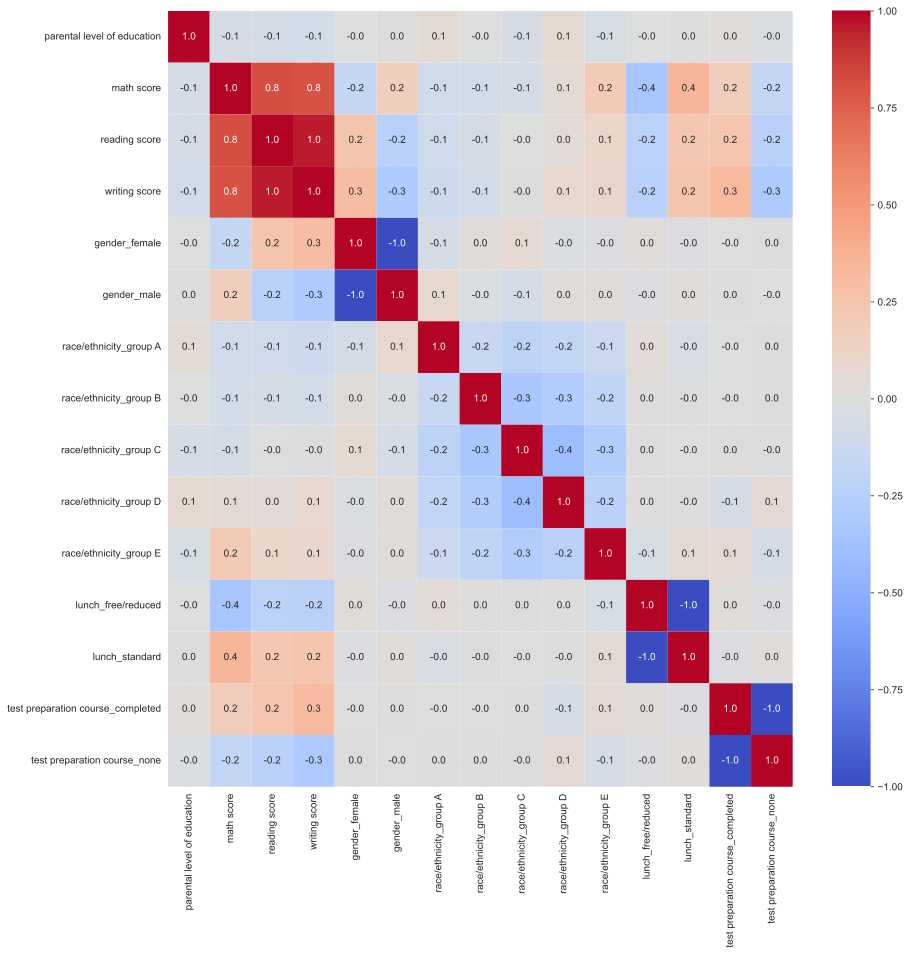

In [132]:
# Perform one-hot encoding on object type columns
df_encoded = pd.get_dummies(df_encoded, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'])

#Set size of heatmap
plt.figure(figsize=(14, 14))
# Create a heatmap
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".1f")#fmt=" .1f"  is used to clean up the heatmap so it only displays one decimal point.

## Truncated Heatmap

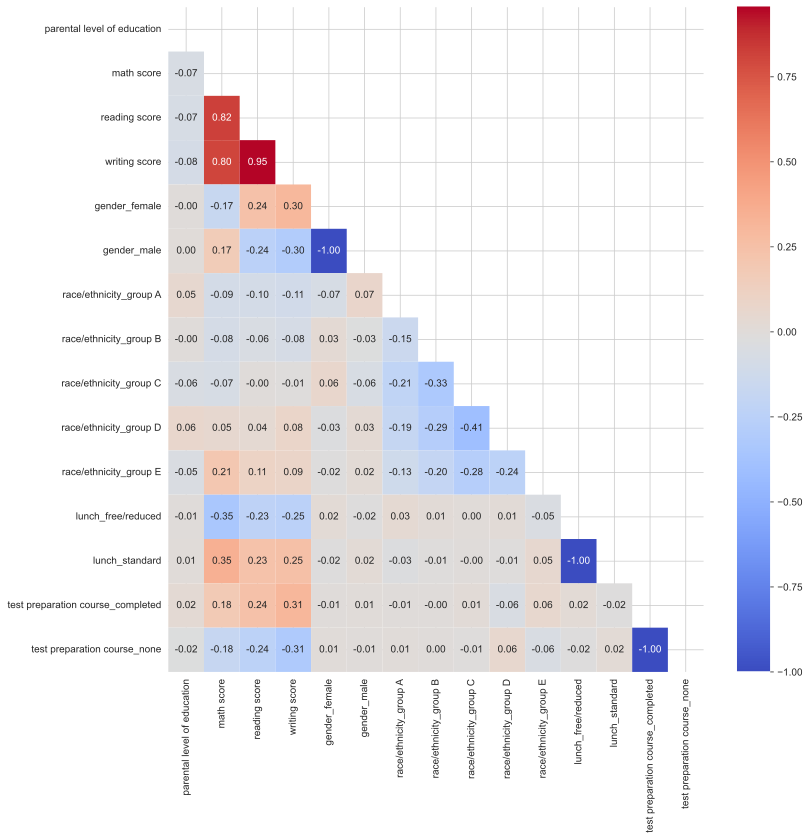

In [133]:
corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.show()

# Correlation Matrix Observations:

Reading and writting scores have the highest positive correlation with math scores.

The next group of highly correlated features to math scores are gender being male with 17%, race/ethnicity being D with 21%, socio-economic status as standard with 35% and finally test preperation with 18%.

# EDA Conclusion:

## Key Insights:


1) Socio-economic status is a big predictor in how students will perform on math tests.
2) Parental level of education is also a very important factor in predicting student math scores.
3) Test preperation also plays a role although not as much as the previous two features. 
4) Gender seems to play a slight role in student math scores. 

## Potential confounding features insight (Socio-economic status and parental level of education):

 The median salary of a person who holds a master's degree in the US is between 70k-90k. The median salary for a person with a bachelors in the U.S. is roughly 80k. The median salary for a person with a highschool diploma is approximately 49k. 

 This is an issue since this demonstrates that the parental level of education is correlated to the amount of money earned which inturn determines if a student will be classified as free/reduced lunch or standard. It stands to reason that a student is more likely to be classified as Standard lunch if their parent has a higher level of education since they would be on average earning more money. 

 This warrants further investigation. 

# -------------------------------------------------------------------

## Using Machine Learing algorithms to extract most important features that predict math scores

## Scaling data using StandardScaler: Although this is not necessary

In [ ]:
#from sklearn.preprocessing import StandardScaler

#continuous_numeric_columns = ['math score', 'reading score', 'writing score']

# Apply standard scaling

#scaler = StandardScaler()
#df_encoded[continuous_numeric_columns] = scaler.fit_transform(df_encoded[continuous_numeric_columns])

In [90]:
df_encoded.head()

,parental level of education,math score,reading score,writing score,...,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1.0,72,72,74,...,False,True,False,True
1,4.0,69,90,88,...,False,True,True,False
2,3.0,90,95,93,...,False,True,False,True
3,0.0,47,57,44,...,True,False,False,True
4,4.0,76,78,75,...,False,True,False,True


# Modeling 

In [134]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

#Random Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import uniform


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [92]:
! pip install xgboost

from xgboost import XGBRegressor


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [93]:
df_encoded.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'gender_male',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none'],
      dtype='object')

In [94]:
df_encoded.head()

,parental level of education,math score,reading score,writing score,...,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1.0,72,72,74,...,False,True,False,True
1,4.0,69,90,88,...,False,True,True,False
2,3.0,90,95,93,...,False,True,False,True
3,0.0,47,57,44,...,True,False,False,True
4,4.0,76,78,75,...,False,True,False,True


## Train_test_split

In [95]:
X = df_encoded.drop([ 'math score','reading score',
       'writing score'], axis=1) #dropping target variables (Math Scores) also dropping (reading and writing scores) since these variables are so closely related

y = df_encoded['math score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model 1. Linear Regression 

In [96]:
#Initializing the model

lr = LinearRegression()

#Fitting the model
lr.fit(X_train, y_train)

#Making predictions on test data
y_pred = lr.predict(X_test)

#Check model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Print results

print('Mean Squared Error', mse)
print('R2 score', r2)

Mean Squared Error 206.68655091216928
R2 score 0.15989169225321587


## Observation: Model can only explain 15% of the variance in the dependent variables in the dataset. A mean squared error score of 206 is very poor! This indicates that the model is underfitting. 

### Model 1.2: Ridge

In [97]:
#Initialize model
ridge = Ridge(alpha=1.0)

#Fit model
ridge.fit(X_train,y_train)

#Predict
y_pred_ridge = ridge.predict(X_test)

#Check scores
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Mean Squared Error', mse_ridge)
print('R^2 Ridge Score', r2_ridge)

Ridge Mean Squared Error 206.6618397754546
R^2 Ridge Score 0.159992134353373


### Model 2. Random Forest Regressor

In [98]:
#initialize the random forest regressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10,random_state=22)


#Train model
rf.fit(X_train, y_train)

#Make prediction
y_pred_rf = rf.predict(X_test)

#Check model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Rf Mean Squared Error', mse_rf)
print('Rf R2 Score', r2_rf)

Rf Mean Squared Error 255.23835895841304
Rf R2 Score -0.03745437170577692


## Evaluation Metrics

In [99]:
#Using cross validation

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean R² from cross-validation:", np.mean(cv_scores))

Cross-validated R² scores: [ 0.08  0.13 -0.07 -0.03  0.06]
Mean R² from cross-validation: 0.03296700210701329


In [100]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0, 1)  # Fraction of features to consider at each split
}


# Instantiate the random search model
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

# Feature importance
feature_importance = best_model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1} importance: {importance}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.8s
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.8s
[CV] END max_depth=61, max_features=0.9507143064099162, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.8s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.5s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.5s
[CV] END max_depth=92, max_features=0.09997491581800289, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.5s
[CV] END max_depth=33, max_features=0.6508884729488529, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   1

In [102]:
#Hyperparameter tuning to avoid overfitting based on GridSearchCV and RandomizedSearchCV


#initialize the random forest regressor

rf = RandomForestRegressor(n_estimators=116, max_depth=57, max_features= 0.2807723624408558, min_samples_leaf= 3, min_samples_split= 3, random_state=22)


#Train model
rf.fit(X_train, y_train)

#Make prediction
y_pred_rf = rf.predict(X_test)

#Check model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Rf Mean Squared Error', mse_rf)
print('Rf R2 Score', r2_rf)

Rf Mean Squared Error 227.3744575698184
Rf R2 Score 0.07580261061593674


RMSE: 15.0789


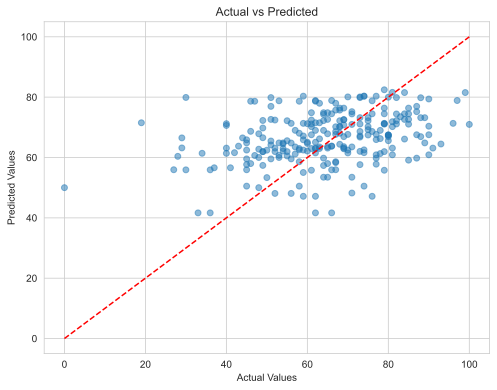

In [103]:
# Visualizing actual vs predicted
import seaborn as sns


# Model Validation
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')

# 2. Simple Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

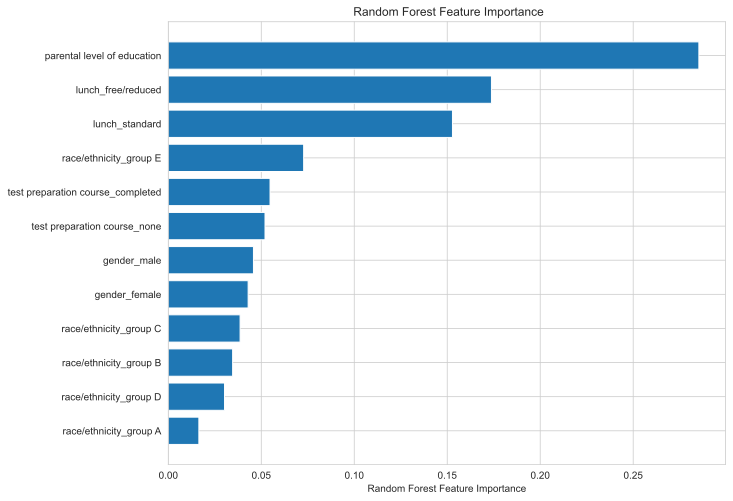

In [104]:
# Extract and plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx], fontsize=10)
plt.xlabel("Random Forest Feature Importance")

plt.title(' Random Forest Feature Importance')
plt.show()

### Conclusion:
The most important features in determining math scores were parental level of education, socio-economic status (standard vs. free/reduced lunch). The second most important feature in determinng math scores is whether a student belongs to race/ethnicity E. The third highest feature used by the model to determine math scores is test preperation completed vs none. 